In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import numpy as np

In [3]:
file_path = 'Most Streamed Spotify Songs 2024.csv'

In [4]:
data = pd.read_csv(file_path, encoding='ISO-8859-1')
data.head()

,Track,Album Name,Artist,Release Date,ISRC,All Time Rank,Track Score,Spotify Streams,Spotify Playlist Count,Spotify Playlist Reach,...,SiriusXM Spins,Deezer Playlist Count,Deezer Playlist Reach,Amazon Playlist Count,Pandora Streams,Pandora Track Stations,Soundcloud Streams,Shazam Counts,TIDAL Popularity,Explicit Track
0,MILLION DOLLAR BABY,Million Dollar Baby - Single,Tommy Richman,4/26/2024,QM24S2402528,1,725.4,"390,470,936","30,716","196,631,588",...,684,62.0,"17,598,718",114.0,"18,004,655","22,931","4,818,457","2,669,262",NaN,0
1,Not Like Us,Not Like Us,Kendrick Lamar,5/4/2024,USUG12400910,2,545.9,"323,703,884","28,113","174,597,137",...,3,67.0,"10,422,430",111.0,"7,780,028","28,444","6,623,075","1,118,279",NaN,1
2,i like the way you kiss me,I like the way you kiss me,Artemas,3/19/2024,QZJ842400387,3,538.4,"601,309,283","54,331","211,607,669",...,536,136.0,"36,321,847",172.0,"5,022,621","5,639","7,208,651","5,285,340",NaN,0
3,Flowers,Flowers - Single,Miley Cyrus,1/12/2023,USSM12209777,4,444.9,"2,031,280,633","269,802","136,569,078",...,"2,182",264.0,"24,684,248",210.0,"190,260,277","203,384",NaN,"11,822,942",NaN,0
4,Houdini,Houdini,Eminem,5/31/2024,USUG12403398,5,423.3,"107,034,922","7,223","151,469,874",...,1,82.0,"17,660,624",105.0,"4,493,884","7,006","207,179","457,017",NaN,1


In [5]:
data['Spotify Streams'] = data['Spotify Streams'].astype(str).str.replace(',', '')
data = data[data['Spotify Streams'].str.isnumeric()]  #ลบข้อมูลที่ไม่ใช่ตัวเลข
data['Spotify Streams'] = data['Spotify Streams'].astype('Int64')  # แปลงข้อมูลเป็นInt64

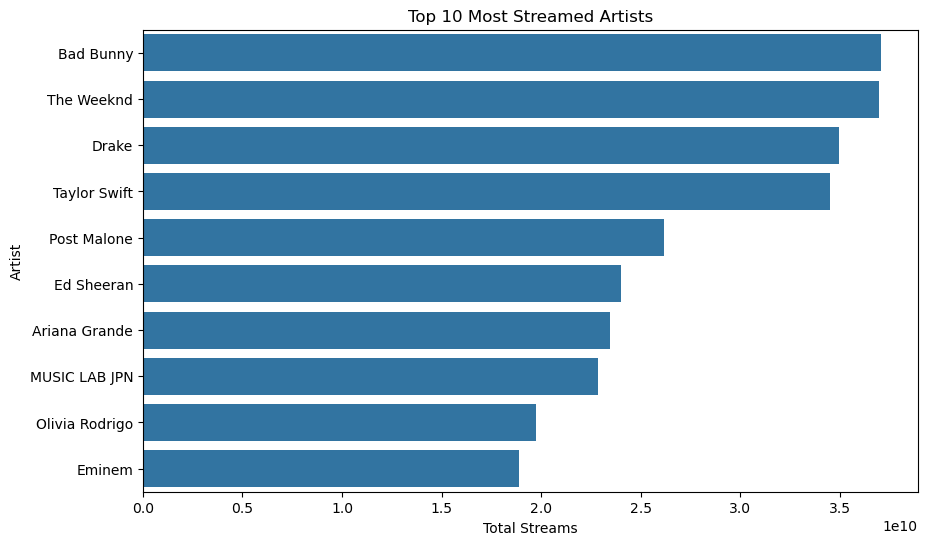

In [6]:
#จำนวนการสตรีมสูงสุดต่อศิลปิน
top_artists = data.groupby('Artist')['Spotify Streams'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_artists.values, y=top_artists.index)
plt.title('Top 10 Most Streamed Artists')
plt.xlabel('Total Streams')
plt.ylabel('Artist')
plt.savefig('top_artists_bar_chart.png')
plt.show()
plt.close()

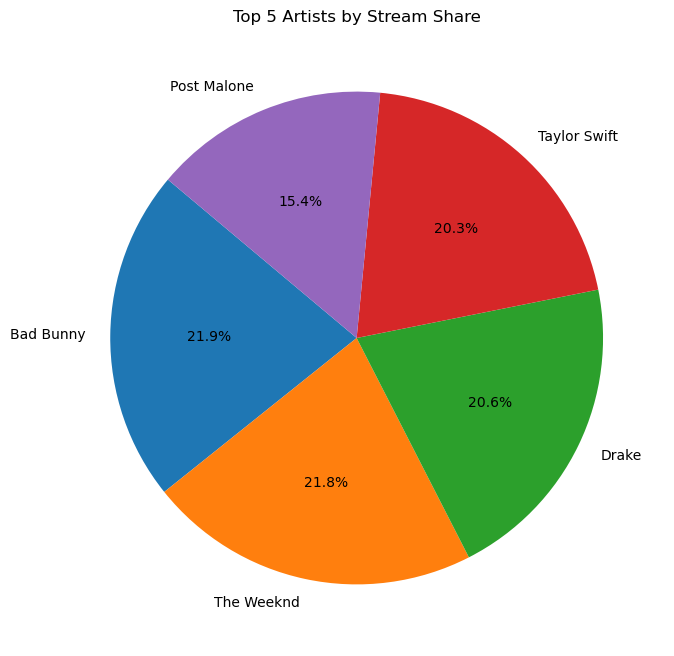

In [7]:
#สัดส่วนการสตรีมของศิลปินยอดนิยม
top_artists_pie = data.groupby('Artist')['Spotify Streams'].sum().sort_values(ascending=False).head(5)
plt.figure(figsize=(8, 8))
plt.pie(top_artists_pie, labels=top_artists_pie.index, autopct='%1.1f%%', startangle=140)
plt.title('Top 5 Artists by Stream Share')
plt.savefig('top_artists_pie_chart.png')
plt.show()
plt.close()

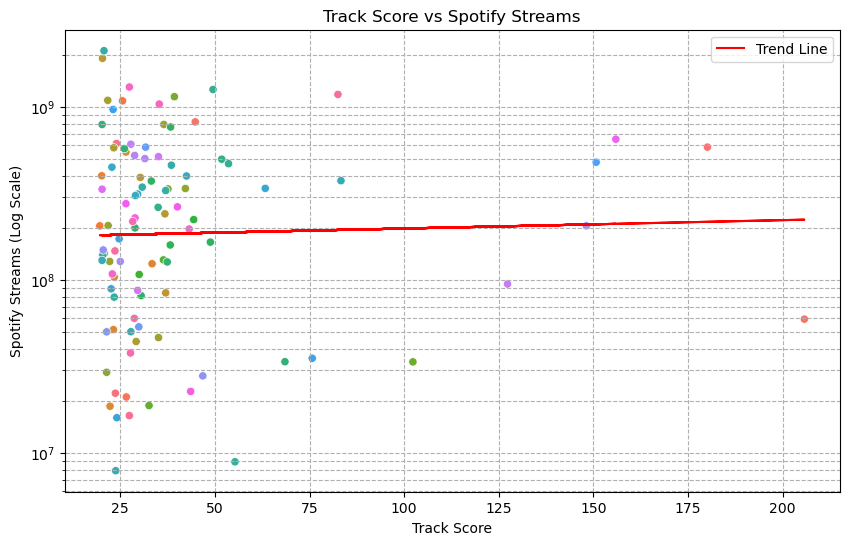

In [8]:
sample_data = data.sample(n=100, random_state=1)

#scatter plot การสตรีมเทียบกับคะแนนเพลง
plt.figure(figsize=(10, 6))
scatter_plot = sns.scatterplot(x='Track Score', y='Spotify Streams', data=sample_data, hue='Artist', legend=False)
plt.yscale('log')
plt.title('Track Score vs Spotify Streams')
plt.xlabel('Track Score')
plt.ylabel('Spotify Streams (Log Scale)')
plt.grid(True, which="both", ls="--")

slope, intercept, r_value, p_value, std_err = stats.linregress(sample_data['Track Score'], np.log(sample_data['Spotify Streams']))
line = np.exp(intercept + slope * sample_data['Track Score'])
plt.plot(sample_data['Track Score'], line, color='red', label='Trend Line')


plt.legend()
plt.savefig('scatter_track_score_vs_streams_with_trendline.png', bbox_inches='tight')
plt.show()
plt.close()

Month
1     Int64
2     Int64
3     Int64
4     Int64
5     Int64
6     Int64
7     Int64
8     Int64
9     Int64
10    Int64
11    Int64
12    Int64
dtype: object
Month                   1           2           3           4            5   \
Artist                                                                        
Ariana Grande   5776864668   975281654  2343927252  4127661944   1120501187   
Bad Bunny       1977947460  6081687071           0           0  16859645811   
Drake           3497774721           0  2801856734  7026246892    835719262   
Ed Sheeran     11558984991           0  5976913537           0   1816356140   
Eminem          6933390416           0           0           0   3178726926   

Month                  6           7           8           9           10  \
Artist                                                                      
Ariana Grande           0  1064927546  2909087522           0  3268543099   
Bad Bunny      1398634184           0           0  

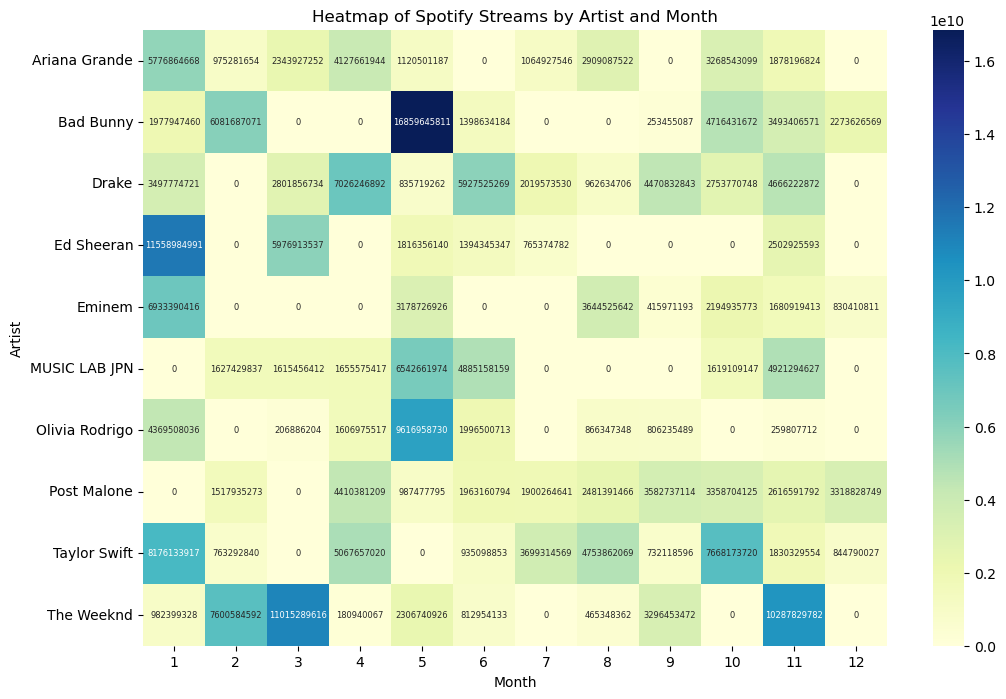

In [9]:
data['Month'] = pd.to_datetime(data['Release Date'], format='%m/%d/%Y').dt.month

#ข้อมูลของศิลปินที่มีจำนวนการสตรีมสูงสุด 10 อันดับแรก
top_artists = data.groupby('Artist')['Spotify Streams'].sum().sort_values(ascending=False).head(10).index
top_artists_data = data[data['Artist'].isin(top_artists)]

heatmap_data = top_artists_data.pivot_table(values='Spotify Streams', index='Artist', columns='Month', aggfunc='sum', fill_value=0)

print(heatmap_data.dtypes)
print(heatmap_data.head())

heatmap_data = heatmap_data.astype(float)

#สร้างheatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap='YlGnBu', annot=True, fmt='.0f', annot_kws={"size": 6})  # ปรับขนาดของตัวเลขให้เล็กลง
plt.title('Heatmap of Spotify Streams by Artist and Month')
plt.xlabel('Month')
plt.ylabel('Artist')
plt.savefig('heatmap_streams_by_artist_and_month.png')
plt.show()
plt.close()

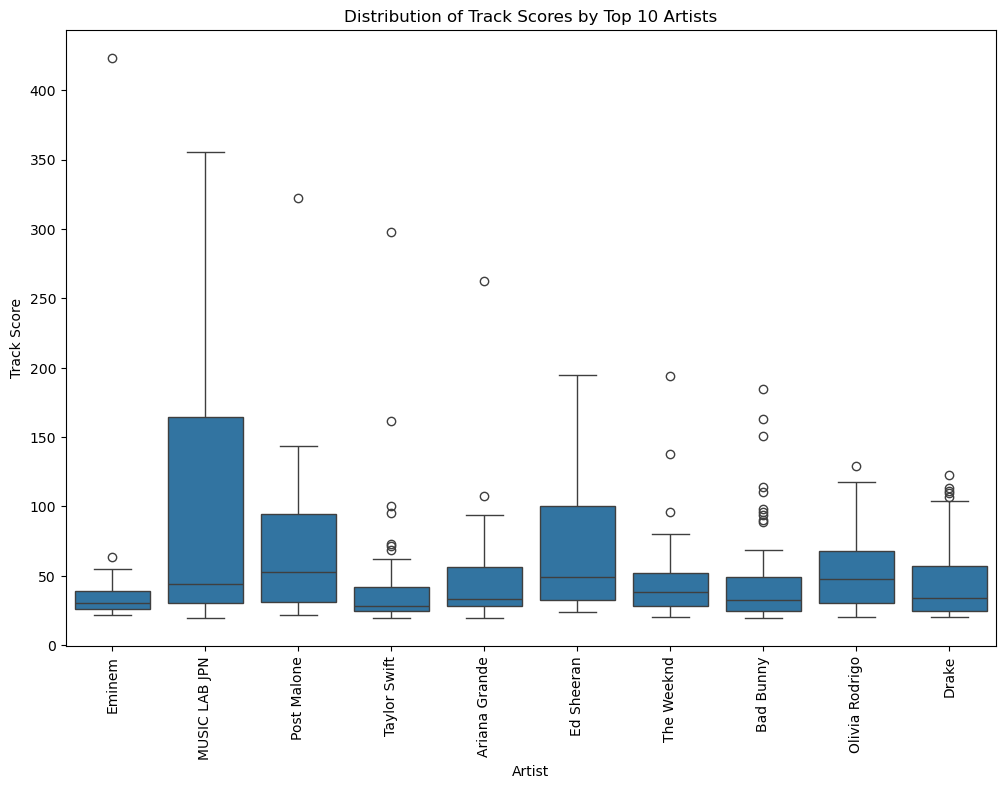

In [14]:
#ข้อมูลของศิลปินที่มีจำนวนการสตรีมสูงสุด 10 อันดับแรก
top_artists = data.groupby('Artist')['Spotify Streams'].sum().sort_values(ascending=False).head(10).index
top_artists_data = data[data['Artist'].isin(top_artists)]

plt.figure(figsize=(12, 8))
ax = sns.boxplot(x='Artist', y='Track Score', data=top_artists_data)
plt.xticks(rotation=90)
plt.title('Distribution of Track Scores by Top 10 Artists')
plt.xlabel('Artist')
plt.ylabel('Track Score')

plt.savefig('boxplot_track_score_by_top_10_artists_with_description.png')
plt.show()
plt.close()

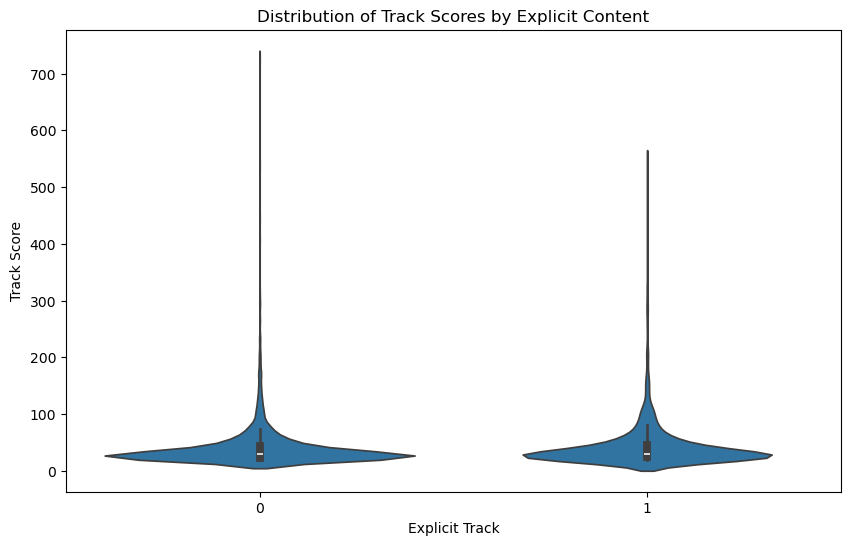

In [15]:
#Violin Plot การกระจายตัวของคะแนนเพลงต่อประเภทเพลง
plt.figure(figsize=(10, 6))
sns.violinplot(x='Explicit Track', y='Track Score', data=data)
plt.title('Distribution of Track Scores by Explicit Content')
plt.xlabel('Explicit Track')
plt.ylabel('Track Score')
plt.savefig('violinplot_track_score_by_explicit.png')
plt.show()
plt.close()

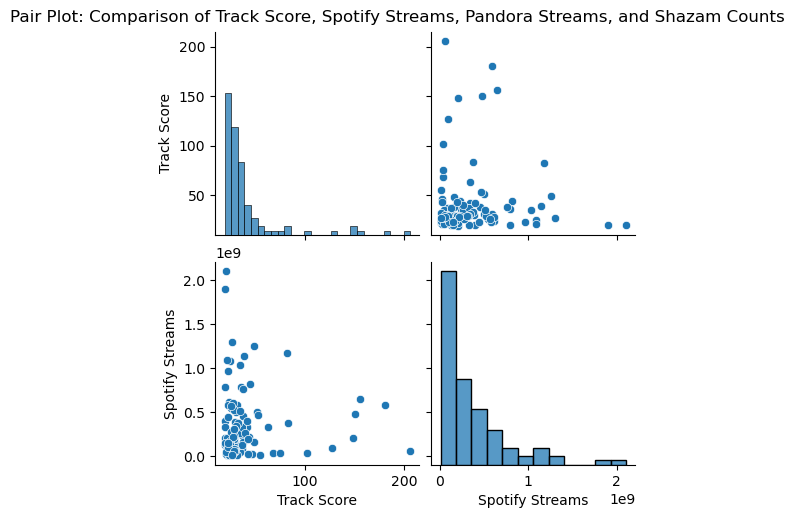

In [18]:
sample_data = data[['Track Score', 'Spotify Streams', 'Pandora Streams', 'Shazam Counts']].sample(n=100, random_state=1)

# Pair Plot เปรียบเทียบหลายตัวแปร
pair_plot = sns.pairplot(sample_data)

pair_plot.fig.suptitle('Pair Plot: Comparison of Track Score, Spotify Streams, Pandora Streams, and Shazam Counts', y=1.02)
pair_plot.savefig('pairplot_features_comparison.png')
plt.show()
plt.close()

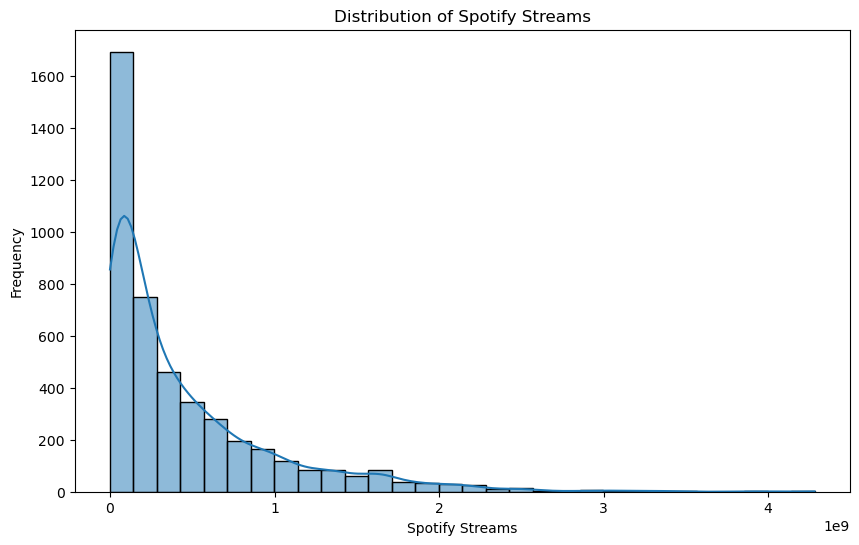

In [19]:
plt.figure(figsize=(10, 6))
sns.histplot(data['Spotify Streams'], bins=30, kde=True)
plt.title('Distribution of Spotify Streams')
plt.xlabel('Spotify Streams')
plt.ylabel('Frequency')


plt.savefig('histogram_spotify_streams_with_description.png')
plt.show()
plt.close()

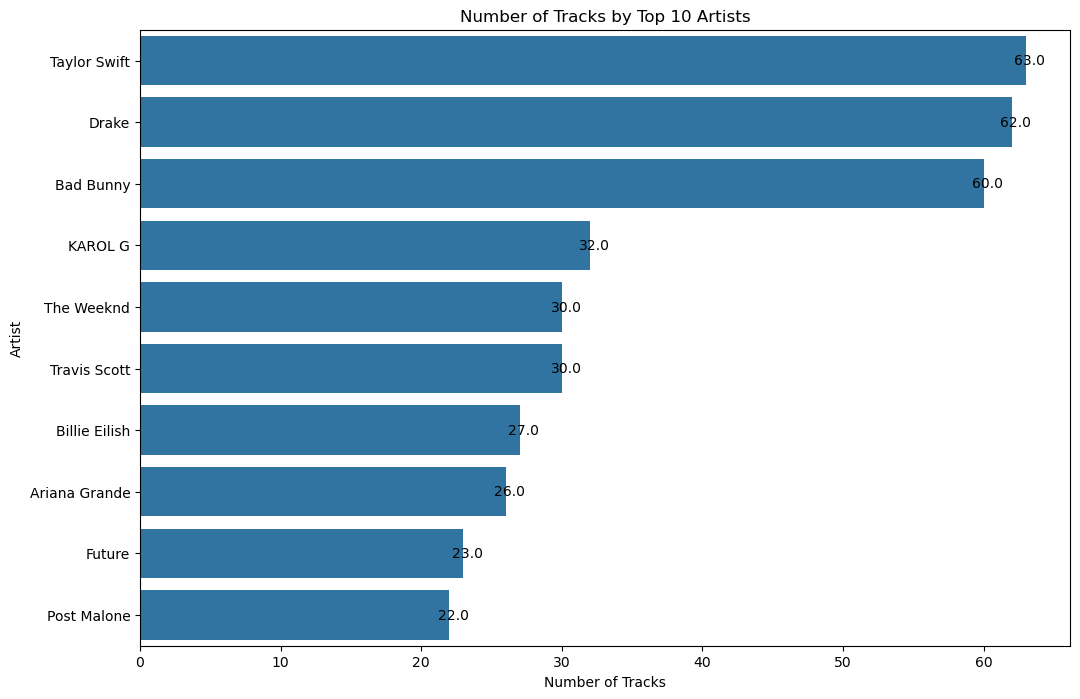

In [21]:
#ศิลปินที่มีเพลงเยอะที่สุด 10 อันดับแรก
top_artists_tracks = data['Artist'].value_counts().head(10).index
top_artists_tracks_data = data[data['Artist'].isin(top_artists_tracks)]

plt.figure(figsize=(12, 8))
ax = sns.countplot(y='Artist', data=top_artists_tracks_data, order=top_artists_tracks)
plt.title('Number of Tracks by Top 10 Artists')
plt.xlabel('Number of Tracks')
plt.ylabel('Artist')

for p in ax.patches:
    ax.annotate(f'{p.get_width()}', (p.get_width() + 0.3, p.get_y() + p.get_height() / 2), 
                ha='center', va='center')

plt.savefig('countplot_tracks_by_top_10_artists.png')
plt.show()
plt.close()